# Run SurvTRACE on SUPPORT dataset

In [1]:
import pdb
from collections import defaultdict
import matplotlib.pyplot as plt

from survtrace.dataset import load_data
from survtrace.evaluate_utils import Evaluator
from survtrace.utils import set_random_seed
from survtrace.model import SurvTraceSingle
from survtrace.train_utils import Trainer
from survtrace.config import STConfig

# define the setup parameters
STConfig['data'] = 'support'

seed = STConfig['seed'] # 1234
#seed = 42

set_random_seed(seed)

hparams = {
    'batch_size': 128,
    'weight_decay': 0,
    'learning_rate': 1e-3,
    'epochs': 20,
}

In [2]:
# load data
df, df_train, df_y_train, df_test, df_y_test, df_val, df_y_val = load_data(STConfig)

# get model
model = SurvTraceSingle(STConfig)

# initialize a trainer
trainer = Trainer(model)
train_loss, val_loss = trainer.fit((df_train, df_y_train), (df_val, df_y_val),
        batch_size=hparams['batch_size'],
        epochs=hparams['epochs'],
        learning_rate=hparams['learning_rate'],
        weight_decay=hparams['weight_decay'],)

GPU not found! will use cpu for training!


/home/cozy/Projects/deep-dialysis.pytorch/SurvTRACE/survtrace/train_utils.py:208: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:1420.)
  next_m.mul_(beta1).add_(1 - beta1, grad)


[Train-0]: 68.97469484806061
[Val-0]: 1.4354215860366821
[Train-1]: 58.16100716590881
[Val-1]: 1.3855706453323364
[Train-2]: 57.81848680973053
[Val-2]: 1.3587766885757446
[Train-3]: 57.50685143470764
[Val-3]: 1.370699167251587
EarlyStopping counter: 1 out of 5
[Train-4]: 57.37078523635864
[Val-4]: 1.3460651636123657
[Train-5]: 57.1936194896698
[Val-5]: 1.3588536977767944
EarlyStopping counter: 1 out of 5
[Train-6]: 57.39272677898407
[Val-6]: 1.3475040197372437
EarlyStopping counter: 2 out of 5
[Train-7]: 57.357582807540894
[Val-7]: 1.3480324745178223
EarlyStopping counter: 3 out of 5
[Train-8]: 57.184396743774414
[Val-8]: 1.349798321723938
EarlyStopping counter: 4 out of 5
[Train-9]: 57.11119365692139
[Val-9]: 1.3487684726715088
EarlyStopping counter: 5 out of 5
early stops at epoch 10


In [3]:
# evaluate model
evaluator = Evaluator(df, df_train.index)
evaluator.eval(model, (df_test, df_y_test))
print("done")

******************************
start evaluation
******************************


/home/cozy/Projects/deep-dialysis.pytorch/venv/lib/python3.10/site-packages/pycox/evaluation/eval_surv.py:36: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  assert pd.Series(self.index_surv).is_monotonic


C-td:  0.38295996847681735
For 0.25 quantile,
TD Concordance Index - IPCW: 0.6320097594782287
Brier Score: 0.1366929595449108
Dynamic AUC:  0.6373691900643684
For 0.5 quantile,
TD Concordance Index - IPCW: 0.6019105928714625
Brier Score: 0.2161103235164085
Dynamic AUC:  0.6153608140445324
For 0.75 quantile,
TD Concordance Index - IPCW: 0.5956090981836647
Brier Score: 0.2342820404074522
Dynamic AUC:  0.6498974872508951
done


## Results

- seed = 1234


    - For 0.25 quantile,
    TD Concordance Index - IPCW: 0.6518277634325532
    Brier Score: 0.13597668200662355
    Dynamic AUC:  0.6543154435066361
    - For 0.5 quantile,
    TD Concordance Index - IPCW: 0.6213892332309874
    Brier Score: 0.2121185611343609
    Dynamic AUC:  0.6390969190626725
    - For 0.75 quantile,
    TD Concordance Index - IPCW: 0.6097067982099736
    Brier Score: 0.22984578874102152
    Dynamic AUC:  0.6646348489778212


- seed = 42


    - For 0.25 quantile,
    TD Concordance Index - IPCW: 0.6320097594782287
    Brier Score: 0.1366929595449108
    Dynamic AUC:  0.6373691900643684
    - For 0.5 quantile,
    TD Concordance Index - IPCW: 0.6019105928714625
    Brier Score: 0.2161103235164085
    Dynamic AUC:  0.6153608140445324
    - For 0.75 quantile,
    TD Concordance Index - IPCW: 0.5956090981836647
    Brier Score: 0.2342820404074522
    Dynamic AUC:  0.6498974872508951

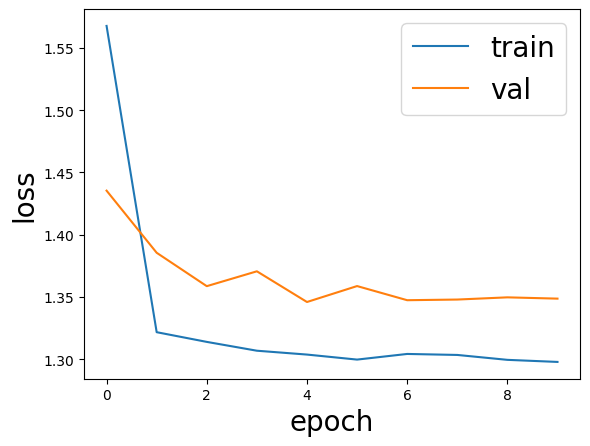

In [4]:
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend(fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.show()